In [1]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import yfinance as yf

# add utils path
src_path = os.path.abspath('../../')
if src_path not in sys.path:
    sys.path.append(src_path)

# import custom functions
from src.backtesting import BacktestTrader
from src.trading_rules import EWMACRule

In [6]:
ewmac = EWMACRule(16, 64)
df = yf.download('SPY', start='2010-01-01', end='2019-12-31', multi_level_index=True)

[*********************100%***********************]  1 of 1 completed


In [7]:
for i in range(len(df)):
    ewmac.generate_forecast(df.iloc[i])

forecasts = ewmac.get_forecasts()
plot_data = ewmac.get_plot_data()

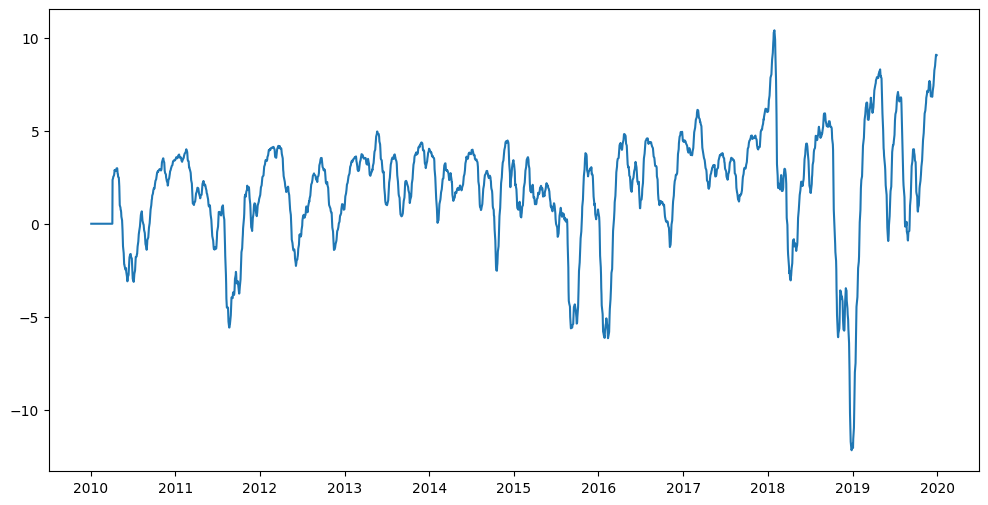

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(forecasts)

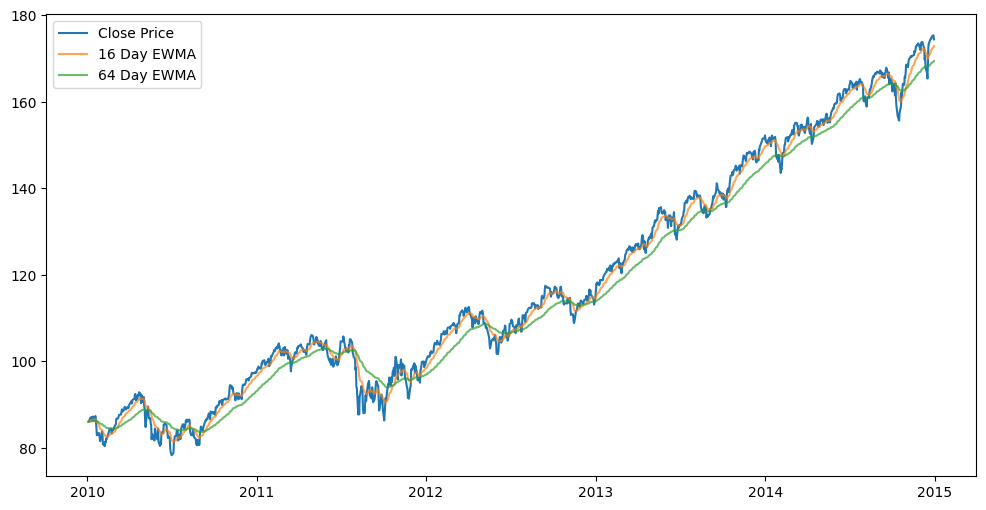

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
for indicator, data in plot_data.items():
    plt.plot(data, label=indicator , alpha=0.7)
    
plt.legend()
plt.show()